<a href="https://colab.research.google.com/github/Nerkanika26/nm-project-phase-3/blob/main/CRACKING_THE_MARKET%3E_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 📥 Load Dataset
df = pd.read_csv("stock_price_time_series.csv")

In [ ]:
# 🗓️ Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

NameError: name 'df' is not defined

In [ ]:
# 📊 Sort values by Company and Date
df = df.sort_values(by=["Company", "Date"]).reset_index(drop=True)

In [ ]:
# 🧠 Data Information
print("🔍 Dataset Info:")
print(df.info())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39130 entries, 0 to 39129
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39130 non-null  datetime64[ns]
 1   Company  39130 non-null  object        
 2   Close    39130 non-null  float64       
 3   Volume   39130 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB
None


In [ ]:
# ❓ Check for Missing Values
print("\n🧼 Missing Values:")
print(df.isnull().sum())


🧼 Missing Values:
Date       0
Company    0
Close      0
Volume     0
dtype: int64


In [ ]:
# ❗ Check for Duplicate Rows
print("\n📄 Duplicate Rows:", df.duplicated().sum())

# 👀 Preview First 5 Rows
print("\n📝 First 5 Records:")
print(df.head())


📄 Duplicate Rows: 0

📝 First 5 Records:
        Date    Company      Close  Volume
0 2010-01-01  Company_1  86.305341  202798
1 2010-01-04  Company_1  86.624243  333255
2 2010-01-05  Company_1  86.903285  238103
3 2010-01-06  Company_1  87.913800  770042
4 2010-01-07  Company_1  87.332922  690925


<ipython-input-9-c6994443bf35>:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


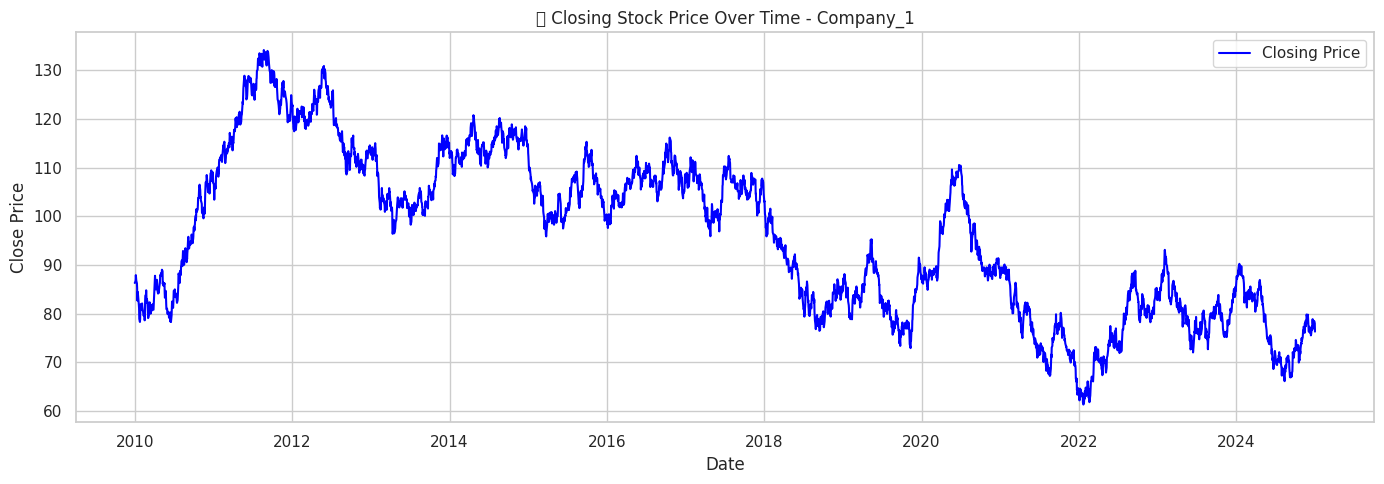

In [ ]:
# 📈 1. Line Plot: Closing Price over Time
plt.figure(figsize=(14, 5))
plt.plot(company_df["Date"], company_df["Close"], label="Closing Price", color='blue')
plt.title("📈 Closing Stock Price Over Time - Company_1")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-10-8ec6347eb17d>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


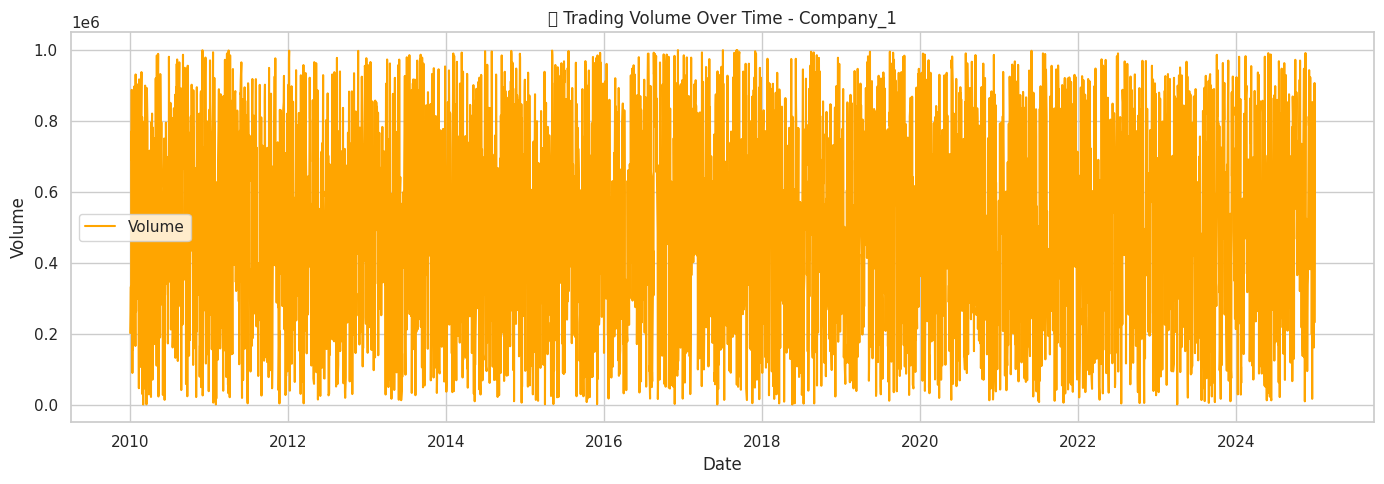

In [ ]:
# 📉 2. Line Plot: Volume over Time
plt.figure(figsize=(14, 5))
plt.plot(company_df["Date"], company_df["Volume"], label="Volume", color='orange')
plt.title("📊 Trading Volume Over Time - Company_1")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-11-f97e800b30e7>:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


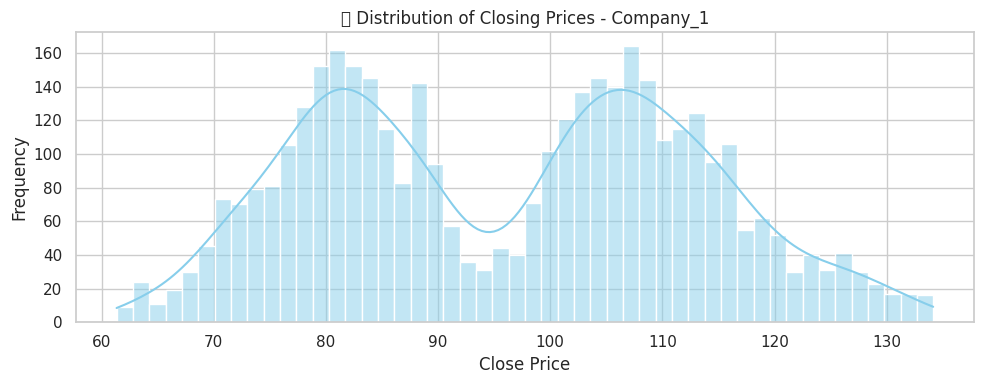

In [ ]:
# 🧾 3. Histogram: Distribution of Closing Prices
plt.figure(figsize=(10, 4))
sns.histplot(company_df["Close"], bins=50, kde=True, color="skyblue")
plt.title("📊 Distribution of Closing Prices - Company_1")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Index(['Date', 'Company', 'Close', 'Volume'], dtype='object')


<ipython-input-12-ae053d515422>:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


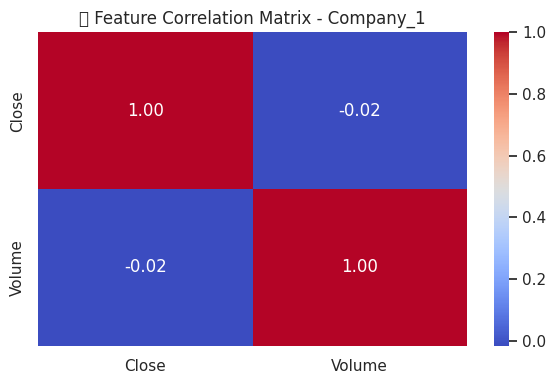

In [ ]:
# 🔥 4. Heatmap: Correlation Matrix
plt.figure(figsize=(6, 4))
# Check available columns in company_df
print(company_df.columns)
# Select existing columns for correlation
corr_matrix = company_df[["Close", "Volume"]].corr()  # Only 'Close' and 'Volume' are available
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Feature Correlation Matrix - Company_1")
plt.tight_layout()
plt.show()

In [ ]:
# 👣 Step 1: Ensure 'Date' column is in datetime format
if df["Date"].dtype != 'datetime64[ns]':
    df["Date"] = pd.to_datetime(df["Date"])

# 👣 Step 2: Set 'Date' as index (do only once)
if df.index.name != "Date":
    df.set_index("Date", inplace=True)

# 👣 Step 3: Filter for one company (if not already done)
if "company_df" not in locals():
    company_df = df[df["Company"] == "Company_1"].copy()

# 👣 Step 4: Check index is datetime (for safety)
if not pd.api.types.is_datetime64_any_dtype(company_df.index):
    company_df.index = pd.to_datetime(company_df.index)

# ✅ Step 5: Create time-based features
company_df["Year"] = company_df.index.year
company_df["Month"] = company_df.index.month
company_df["Day"] = company_df.index.day
company_df["Weekday"] = company_df.index.weekday

# ✅ Step 6: Create lag features
company_df["Lag_1"] = company_df["Close"].shift(1)
company_df["Lag_7"] = company_df["Close"].shift(7)

# ✅ Step 7: Create rolling averages
company_df["Rolling_7"] = company_df["Close"].rolling(window=7).mean()
company_df["Rolling_30"] = company_df["Close"].rolling(window=30).mean()

# ✅ Step 8: Drop rows with missing values (caused by lag/rolling)
company_df.dropna(inplace=True)

# 🖥️ Preview result
print(company_df.head())


                                    Date    Company      Close  Volume  Year  \
1970-01-01 00:00:00.000000029 2010-02-11  Company_1  79.738188  917295  1970   
1970-01-01 00:00:00.000000030 2010-02-12  Company_1  79.508737  198780  1970   
1970-01-01 00:00:00.000000031 2010-02-15  Company_1  79.898086  452448  1970   
1970-01-01 00:00:00.000000032 2010-02-16  Company_1  78.632967  749810  1970   
1970-01-01 00:00:00.000000033 2010-02-17  Company_1  79.724959  107311  1970   

                               Month  Day  Weekday      Lag_1      Lag_7  \
1970-01-01 00:00:00.000000029      1    1        3  79.743715  80.857758   
1970-01-01 00:00:00.000000030      1    1        3  79.738188  81.805198   
1970-01-01 00:00:00.000000031      1    1        3  79.508737  82.096232   
1970-01-01 00:00:00.000000032      1    1        3  79.898086  81.460672   
1970-01-01 00:00:00.000000033      1    1        3  78.632967  80.439120   

                               Rolling_7  Rolling_30  
1970-01

<ipython-input-13-fce11c8569e4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df["Year"] = company_df.index.year
<ipython-input-13-fce11c8569e4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df["Month"] = company_df.index.month
<ipython-input-13-fce11c8569e4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs